In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv')
target = train.target

In [50]:
preds_cb = pd.read_csv('../predictions/train/9222_catboost_poisson_bootstrap_10_folds_0804042543.csv')

In [51]:
test_cb = pd.read_csv('../predictions/test/9222_catboost_poisson_bootstrap_10_folds_0804042543.csv')

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
roc_auc_score(target, preds_cb.target)

0.9221981787081015

In [54]:
from sklearn.calibration import calibration_curve

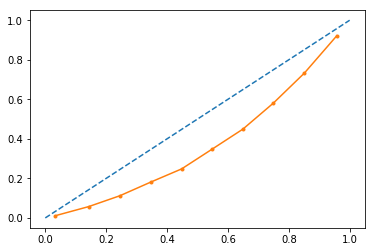

In [55]:
fop, mpv = calibration_curve(target, preds_cb.target, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

In [72]:
from sklearn.isotonic import IsotonicRegression
ir = IsotonicRegression(y_min=0, y_max=1, out_of_bounds='clip')

In [73]:
preds_is = ir.fit_transform(preds_cb.target, target)

In [74]:
test_is = ir.transform(test_cb.target)

In [75]:
new_oof = preds_cb.copy()
new_oof.target = preds_is
new_oof.to_csv('../predictions/train/9225_catboost_isotonic_09040646.csv', index=False)

new_test = test_cb.copy()
new_test.target = test_is
new_test.to_csv('../predictions/test/9225_catboost_isotonic_09040646.csv', index=False)

In [69]:
roc_auc_score(target, preds_is)

0.9225056908367595

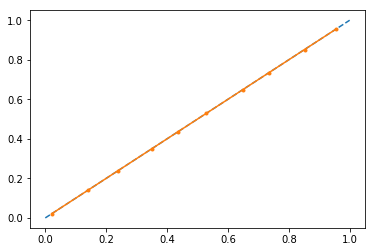

In [24]:
fop, mpv = calibration_curve(target, preds_is, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

In [26]:
from sklearn.calibration import CalibratedClassifierCV

In [37]:
cal = CalibratedClassifierCV(method='sigmoid', cv=10)
cal.fit(preds_cb.values.reshape((-1, 1)), target)

CalibratedClassifierCV(base_estimator=None, cv=10, method='sigmoid')

In [38]:
preds_cal = cal.predict_proba(preds_cb.values.reshape((-1, 1)))[:, 1]

In [39]:
roc_auc_score(target, preds_cal)

0.9221981787081015